In [131]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import src.helper_funcs as helper

plt.style.use('ggplot')
sns.set_palette('colorblind')

In [68]:
df = pd.read_csv('data/COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths.csv')
df.head()

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176148 entries, 0 to 176147
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   extract_date         176148 non-null  object
 1   specimen_date        176148 non-null  object
 2   Number_tested        176148 non-null  int64 
 3   Number_confirmed     176148 non-null  int64 
 4   Number_hospitalized  176148 non-null  int64 
 5   Number_deaths        176148 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.1+ MB


In [70]:
df.describe()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
count,176148.000000,176148.000000,176148.000000,176148.000000
mean,11141.475714,1427.914680,234.946375,73.940686
std,6413.050113,1368.222368,392.006729,160.110002
min,1.000000,0.000000,0.000000,0.000000
25%,6738.000000,371.000000,38.000000,4.000000
50%,10885.000000,1135.000000,115.000000,21.000000
75%,16448.000000,1960.000000,199.000000,44.000000
max,24727.000000,6852.000000,2016.000000,923.000000


In [71]:
valid = df[df['Number_tested'] > 1]

In [72]:
valid['specimen_date'] = pd.to_datetime(valid['specimen_date'])

/tmp/ipykernel_5442/2117046692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['specimen_date'] = pd.to_datetime(valid['specimen_date'])


In [73]:
good_dates = valid[valid['specimen_date'] >= '1/1/2020']

In [74]:
good_dates = valid[valid['specimen_date'] <= '10/12/2021']

In [75]:
good_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170140 entries, 0 to 176147
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   extract_date         170140 non-null  object        
 1   specimen_date        170140 non-null  datetime64[ns]
 2   Number_tested        170140 non-null  int64         
 3   Number_confirmed     170140 non-null  int64         
 4   Number_hospitalized  170140 non-null  int64         
 5   Number_deaths        170140 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.1+ MB


In [76]:
good_dates.head()

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,2020-04-17,9979,3386,527,96
2,04/29/2020,2020-03-05,63,5,3,1
3,04/29/2020,2020-04-09,9019,4803,1253,386
4,04/29/2020,2020-04-03,9389,5523,1688,582
5,04/29/2020,2020-03-25,7457,4803,1395,429


In [77]:
good_dates.describe()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
count,170140.000000,170140.000000,170140.000000,170140.000000
mean,11534.869261,1478.331321,243.238010,76.550829
std,6167.830406,1365.142438,396.333149,162.298195
min,2.000000,0.000000,0.000000,0.000000
25%,7114.000000,434.000000,45.000000,5.000000
50%,11246.000000,1194.000000,120.000000,22.000000
75%,16569.000000,2025.000000,205.000000,45.000000
max,24727.000000,6852.000000,2016.000000,923.000000


In [78]:
good_dates.sort_values('specimen_date', inplace = True)

In [79]:
good_dates.drop(columns = 'extract_date', inplace = True)

In [80]:
good_dates.reset_index(drop = True, inplace = True)

In [81]:
good_dates.head()

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,2020-01-01,2,2,0,1
1,2020-01-01,2,2,0,1
2,2020-01-01,2,2,0,1
3,2020-01-01,2,2,0,1
4,2020-01-01,2,2,1,1


In [82]:
group = good_dates.groupby('specimen_date')

In [92]:
tests = group.aggregate(sum)

In [93]:
tests.head()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
specimen_date,,,,
2020-01-01,28,28,1,14
2020-01-02,2366,551,259,0
2020-01-03,2072,1006,0,0
2020-01-04,7768,1144,243,0
2020-01-05,13138,2207,0,0


In [94]:
final = tests[tests['Number_tested'] >= 10_000]
final.head()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
specimen_date,,,,
2020-01-05,13138,2207,0,0
2020-01-08,11376,2655,508,0
2020-03-04,18517,4037,5680,1014
2020-03-05,33406,3658,7628,786
2020-03-06,43659,8206,4764,1377


In [95]:
final.tail()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
specimen_date,,,,
2021-09-23,88124,2312,81,0
2021-09-24,72740,1757,44,0
2021-09-25,31784,952,30,0
2021-09-26,21785,659,17,0
2021-09-27,15895,304,13,0


In [109]:
final = helper.make_ratio(final, 'Number_confirmed', 'Number_tested', 'Confirmed_ratio')

In [111]:
final = helper.make_ratio(final, 'Number_hospitalized', 'Number_tested', 'Hospitalized_ratio')

In [112]:
final = helper.make_ratio(final, 'Number_deaths', 'Number_tested', 'Deaths_ratio')

In [113]:
final.head()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,Confirmed_ratio,Hospitalized_ratio,Deaths_ratio
specimen_date,,,,,,,
2020-01-05,13138,2207,0,0,0.167986,0.000000,0.000000
2020-01-08,11376,2655,508,0,0.233386,0.044655,0.000000
2020-03-04,18517,4037,5680,1014,0.218016,0.306745,0.054760
2020-03-05,33406,3658,7628,786,0.109501,0.228342,0.023529
2020-03-06,43659,8206,4764,1377,0.187957,0.109118,0.031540


In [130]:
final.tail()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,Confirmed_ratio,Hospitalized_ratio,Deaths_ratio
specimen_date,,,,,,,
2021-09-23,88124,2312,81,0,0.026236,0.000919,0.0
2021-09-24,72740,1757,44,0,0.024155,0.000605,0.0
2021-09-25,31784,952,30,0,0.029952,0.000944,0.0
2021-09-26,21785,659,17,0,0.030250,0.000780,0.0
2021-09-27,15895,304,13,0,0.019126,0.000818,0.0


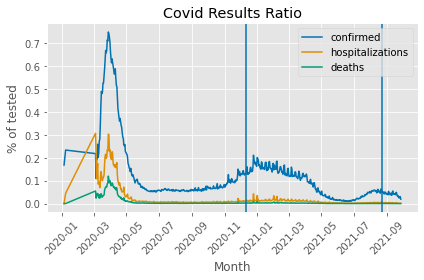

In [133]:
plt.figure()
plt.plot(final.index, final['Confirmed_ratio'], label = 'confirmed')
plt.plot(final.index, final['Hospitalized_ratio'], label = 'hospitalizations')
plt.plot(final.index, final['Deaths_ratio'], label = 'deaths')

plt.legend()
plt.ylabel('% of tested')
plt.xlabel('Month')
plt.title('Covid Ratios Over Time')
plt.axvline(x = pd.to_datetime('12/11/2020'))
plt.axvline(x = pd.to_datetime('8/23/2021'))
plt.xticks(rotation = 45)
plt.tight_layout()

plt.savefig()